D:\Anaconde2\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


tr_chn    float64
tr_mat    float64
dtype: object
tr_chn    82.781893
tr_mat    77.407503
dtype: float64
[82.78189300411523, 82.86847492323439, 83.23223480947478, 84.26578411405295, 83.50205761316873, 82.55184804928132, 83.43319630010278, 83.15392456676861, 83.76332288401254, 82.87226847034339, 82.8774358974359, 83.61048879837067, 83.89054470709146, 84.021494370522, 82.85219164118247, 83.281217750258, 82.7774358974359, 81.77602040816326, 83.84378211716341, 83.43288934426229, 82.30020597322348, 82.86974358974359, 83.07668711656441, 83.1726618705036, 83.20712809917356, 82.9448717948718, 82.48899692937565, 82.56108829568788, 82.48309426229508, 83.29836233367452] [77.40750256937308, 77.90736949846469, 78.1742268041237, 79.02551020408163, 77.97687564234327, 78.78483606557377, 79.7934224049332, 77.88277268093782, 78.9592050209205, 76.85989583333334, 78.72997946611909, 78.57602040816326, 78.91064049586777, 79.24155578300922, 78.91530612244898, 78.33402275077559, 78.01846153846154, 75.84422880

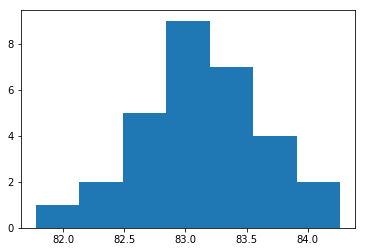

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.core.frame import DataFrame
ceps = pd.read_csv('CEPS.csv',encoding='gb2312')#读取CEPS
#选取两个连续变量：未标准化的语文成绩和数学成绩
ceps[['tr_chn','tr_mat']]= ceps[['tr_chn','tr_mat']].apply(pd.to_numeric,errors='coerce')#将object类型转换为数值型
data = ceps.sample(n=1000,random_state=1)#随机抽取1000行,random_state是随机种子
df = data[['tr_chn','tr_mat']]
print(df.dtypes)#可以看到两个变量均转换为了float类型
print(df.mean())#在随机抽取的1000个样本中，语文成绩均值82.781893，数学成绩均值77.407503

a = []
b = []
for i in range(30):
    data1 = ceps.sample(n=1000, random_state=1+i)
    df1 = data1[['tr_chn']]
    df2 = data1[['tr_mat']]
    a.append(df1.mean()[-1])
    b.append(df2.mean()[-1])
print(a,b)#a,b中保存了两个变量的均值

c = {"mean_chn" : a,"mean_mat" : b}
data_mean=DataFrame(c)
data_mean[['mean_chn','mean_mat']]= data_mean[['mean_chn','mean_mat']].apply(pd.to_numeric,errors='coerce')
print(data_mean)
print(data_mean.describe())#均值的均值和标准误结果
plt.hist(a, bins='auto')
#plt.hist(b, bins='auto')#分开运行得到两张直方图
plt.show()

In [6]:
est=smf.ols(formula='tr_mat ~ stcog + stsex + b18a ',data=ceps).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 tr_mat   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        21:09:56   Log-Likelihood:                -90160.
No. Observations:               18990   AIC:                         1.804e+05
Df Residuals:                   18961   BIC:                         1.806e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.6703      1.778     16.121      0.0